## Background
In today's globally interconnected society, education plays a pivotal role in shaping the future of individuals and nations. Universities are at the forefront of this educational landscape, serving as centers for academic excellence, research innovation, and cultural exchange. However, with thousands of universities worldwide, choosing the right institution can be a challenging task for students, faculty, and policymakers alike.

To simplify this decision-making process and to benchmark the performance of educational institutions, various organizations publish annual university rankings. These rankings evaluate universities based on multiple criteria such as academic reputation, faculty qualifications, student-to-staff ratio, and internationalization, among others.

### Objective
The primary aim of this project is to perform a comprehensive analysis of the World University Rankings dataset. By scrutinizing various metrics and indicators, we aspire to uncover insights that may not be immediately apparent.

### Data Source
The dataset used in this project encompasses multiple years of world university rankings, including several key metrics such as university name, country, rank, and various performance indicators.

### Methodology

The project will employ data analytics techniques to:

<ul>
<li>Data Cleaning: Remove or impute missing values, handle outliers, and convert data types as needed.</li>
<li>Exploratory Data Analysis: Generate statistics and visualizations to understand the distribution, frequency, and correlation of various variables.</li>
<li>Conclusions: Summarize the key findings, provide actionable insights, and make recommendations based on the analysis.</li>
</ul>
By adopting a comprehensive and multi-dimensional analytical approach, this project aims to distill large volumes of data into actionable insights and meaningful narratives. 

### 1. Data Cleaning
First, we import required libraries and create a data frame from the CSV file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('/kaggle/input/global-university-rankings-dataset-2023/world_university_rank.csv')
df.head(10)

,Rank,University name,locationLocation,Number of Studnet,Number of student per staffs,International Student,Female : male ratio
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60
5,6,California Institute of Technology,United States,"2,237",6.2,34%,37 : 63
6,7,Princeton University,United States,"8,279",8.0,23%,46 : 54
7,8,"University of California, Berkeley",United States,"40,921",18.4,24%,52 : 48
8,9,Yale University,United States,"13,482",5.9,21%,52 : 48
9,10,Imperial College London,United Kingdom,"18,545",11.2,61%,40 : 60


In [3]:
# Basic information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          2345 non-null   object 
 1   University name               2345 non-null   object 
 2   locationLocation              2234 non-null   object 
 3   Number of Studnet             2345 non-null   object 
 4   Number of student per staffs  2344 non-null   float64
 5   International Student         2345 non-null   object 
 6   Female : male ratio           2255 non-null   object 
dtypes: float64(1), object(6)
memory usage: 128.4+ KB


At this stage, we 
<ul>
<li>Fix Typos and Standardize Column Names: Correct typos and standardize column names for better readability.</li>
<li>Convert Columns to Appropriate Formats: Change the data type of columns to match their content.</li>
<li>Handle Missing and Duplicate Values: Deal with any NaN, missing, and duplicate values in the data.</li>
</ul>

In [4]:
null_vals=df.isnull().sum()
print(null_vals)

Rank                              0
University name                   0
locationLocation                111
Number of Studnet                 0
Number of student per staffs      1
International Student             0
Female : male ratio              90
dtype: int64


In [5]:
duplicate_rows=df.duplicated()
num_duplicate_rows=duplicate_rows.sum()
num_duplicate_rows

0

In [6]:
df.rename(columns={'University name':'Name of University',
                   'locationLocation':'Country',
                   'Number of Studnet':'Number of Students',
                   'Number of student per staffs':'Student per Staff',
                   'International Student':'International Students',
                   'Female : male ratio': 'Female-Male Ratio'}, inplace=True)

In [7]:
# Replace empty strings in 'Number of Students' column with NaN
df['Number of Students']=df['Number of Students'].replace('', np.nan)
# Drop Null values in 'Number of Students' column
df.dropna(subset=['Number of Students'], inplace=True)
# Convert 'Number of Students' to integer after removing commas
df['Number of Students']=df['Number of Students'].str.replace(',', '').astype(int)

# Remove the '%' sign and replace empty strings with NaN
df['International Students']=df['International Students'].str.rstrip('%').replace('', np.nan)
# Drop Null values in the 'International Students' column
df.dropna(subset=['International Students'], inplace=True)
# Convert 'International Students' to float
df['International Students']=df['International Students'].astype(float) / 100.0

# Separate the 'Female-Male Ratio' column into two columns and replace empty strings with NaN
df[['Female Ratio', 'Male Ratio']]=df['Female-Male Ratio'].str.split(':', expand=True)
df[['Female Ratio', 'Male Ratio']]=df[['Female Ratio', 'Male Ratio']].replace('', np.nan)
# Drop Null values in the 'Female Ratio' and 'Male Ratio' columns
df.dropna(subset=['Female Ratio', 'Male Ratio'], inplace=True)
# Convert 'Female Ratio' and 'Male Ratio' to integer
df['Female Ratio']=df['Female Ratio'].astype(int)
df['Male Ratio']=df['Male Ratio'].astype(int)

# Drop the original 'Female-Male Ratio' column
df.drop('Female-Male Ratio', axis=1, inplace=True)

# Drop Null values in 'Country' column
df.dropna(subset=['Country'], inplace=True)

# Display the cleaned data
df.head()

,Rank,Name of University,Country,Number of Students,Student per Staff,International Students,Female Ratio,Male Ratio
0,1,University of Oxford,United Kingdom,20965,10.6,0.42,48,52
1,2,Harvard University,United States,21887,9.6,0.25,50,50
2,3,University of Cambridge,United Kingdom,20185,11.3,0.39,47,53
3,3,Stanford University,United States,16164,7.1,0.24,46,54
4,5,Massachusetts Institute of Technology,United States,11415,8.2,0.33,40,60


### Step 2: Exploratory Data Analysis (EDA)

Let's start by examining the basic statistics for each numerical column.

In [8]:
df.describe()

,Number of Students,Student per Staff,International Students,Female Ratio,Male Ratio
count,2150.000000,2150.000000,2150.000000,2150.000000,2150.000000
mean,19428.734884,19.012233,0.101219,50.862326,49.137674
std,25398.155299,11.903702,0.134562,13.582714,13.582714
min,115.000000,0.400000,0.000000,2.000000,0.000000
25%,6763.750000,12.600000,0.010000,44.000000,41.000000
50%,14001.000000,16.750000,0.050000,53.000000,47.000000
75%,25317.000000,22.375000,0.140000,59.000000,56.000000
max,460632.000000,232.200000,1.000000,100.000000,98.000000


<ul>
<li>Number of Students: The number of students varies widely among the universities, with a mean of around 19,052 students. The smallest university has 115 students, while the largest has 460,632.</li>
<li>Student per Staff: On average, there are about 19 students for each staff member. The minimum ratio is 0.4, and the maximum is an unusually high 232.2.</li>
<li>International Students: The average percentage of international students is about 10%. Some universities have no international students, while others are fully international.</li>
<li>Female Ratio and Male Ratio: The average ratio seems to be approximately equal for both genders, with slight favor towards females (50.86% female and 49.14% male). However, some universities have extremely skewed gender ratios.</li>
</ul>

Now, we use visualizations to identify patterns and trends.

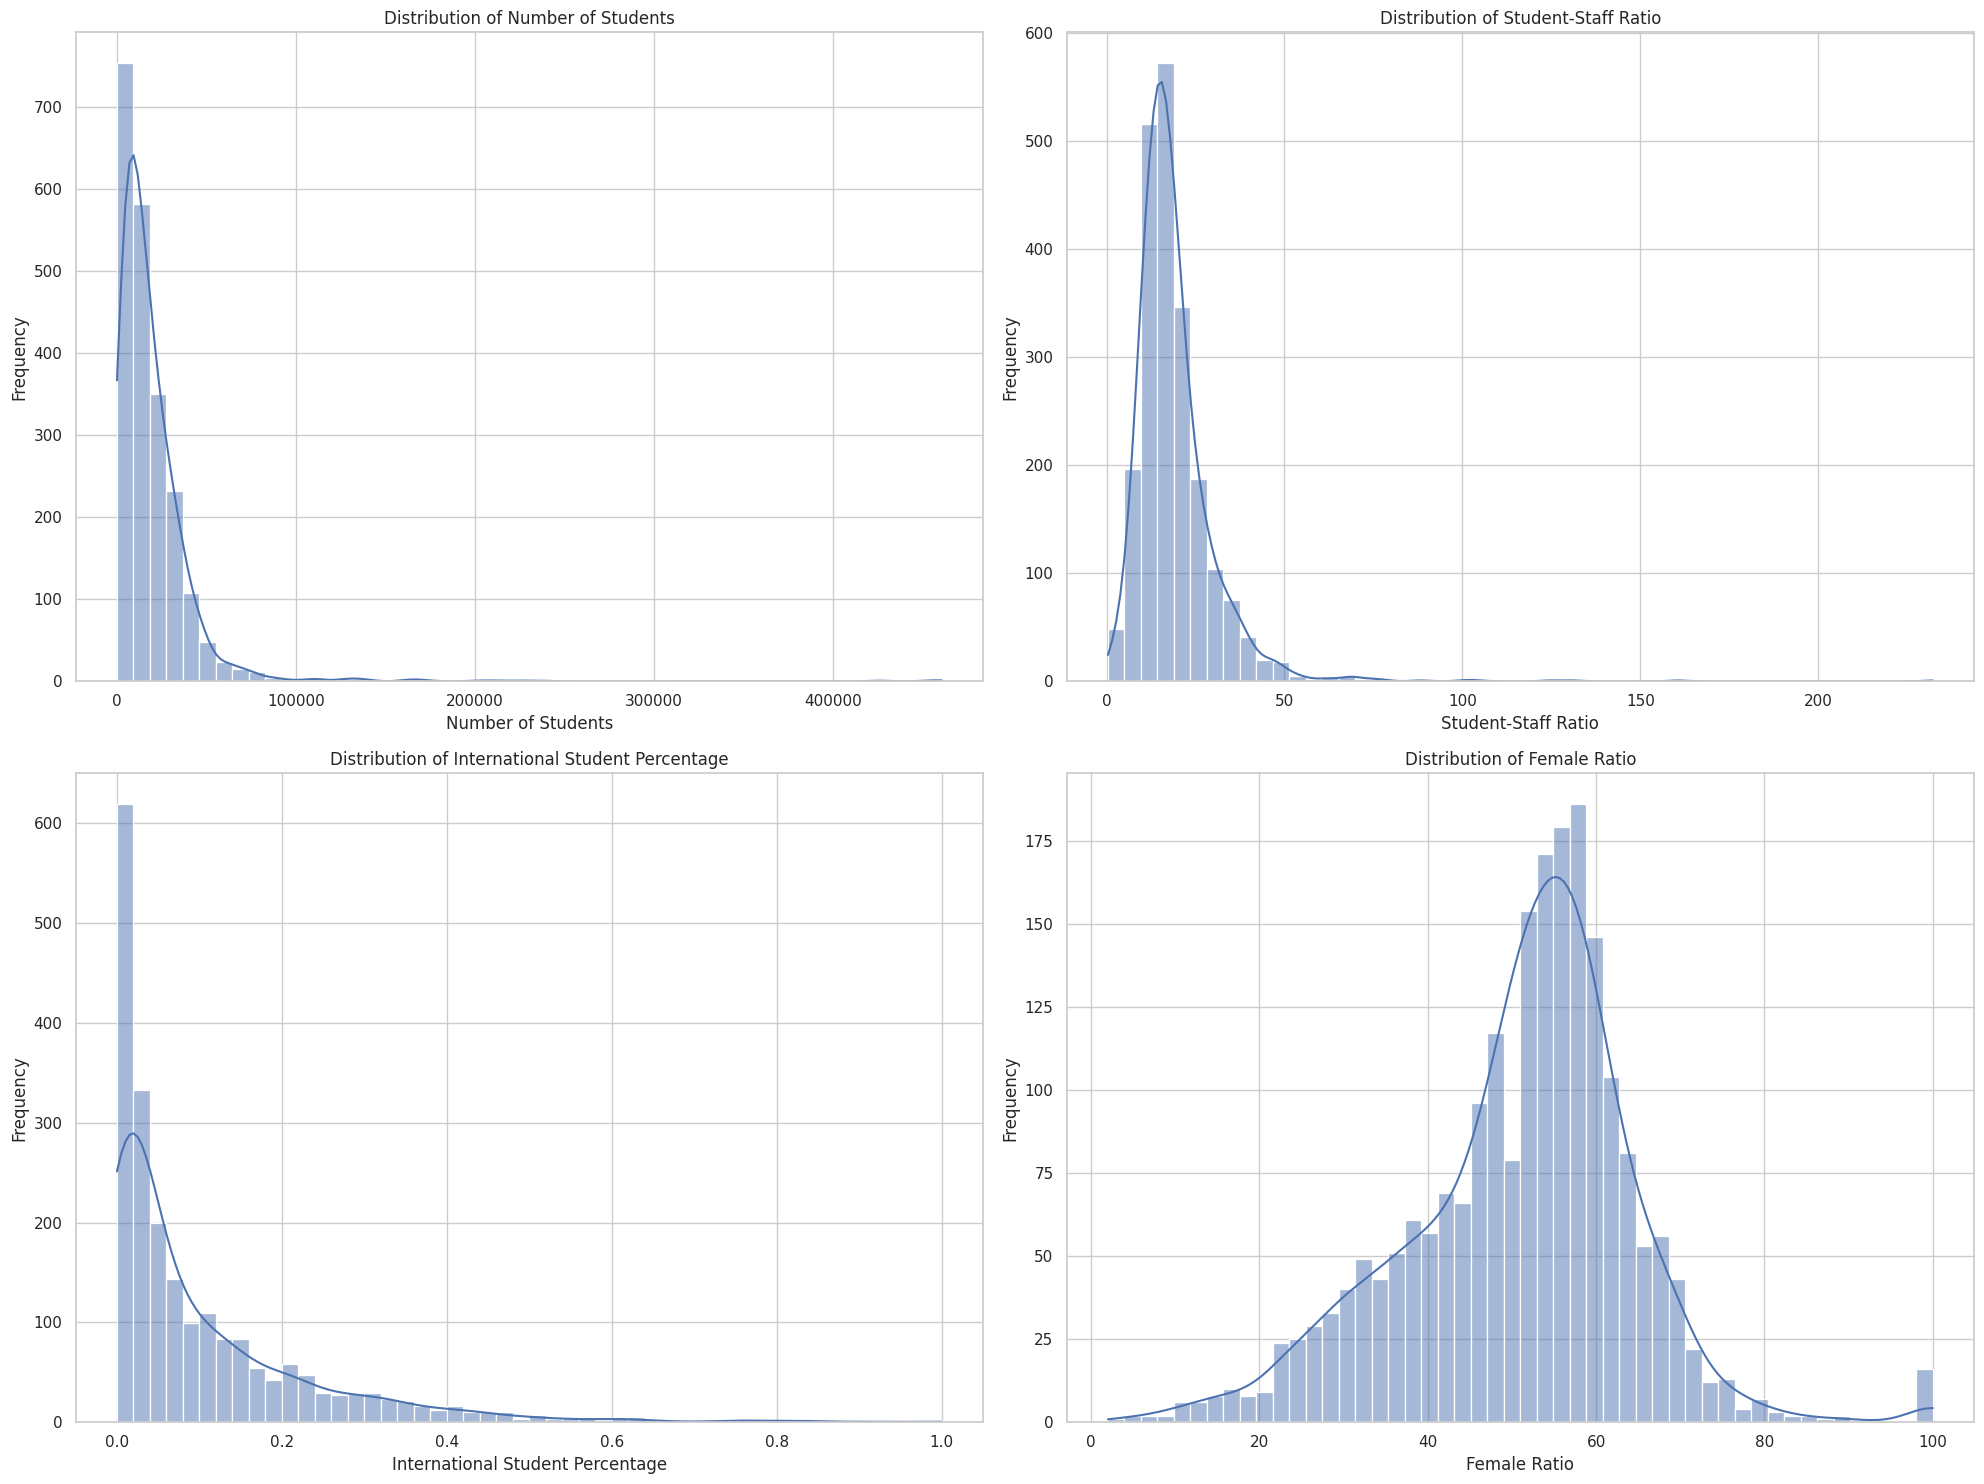

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(20, 15))

# Distribution of the Number of Students
plt.subplot(2, 2, 1)
sns.histplot(df['Number of Students'], bins=50, kde=True)
plt.title('Distribution of Number of Students')
plt.xlabel('Number of Students')
plt.ylabel('Frequency')

# Distribution of the Student-Staff ratio
plt.subplot(2, 2, 2)
sns.histplot(df['Student per Staff'], bins=50, kde=True)
plt.title('Distribution of Student-Staff Ratio')
plt.xlabel('Student-Staff Ratio')
plt.ylabel('Frequency')

# Distribution of the International Student percentage
plt.subplot(2, 2, 3)
sns.histplot(df['International Students'], bins=50, kde=True)
plt.title('Distribution of International Student Percentage')
plt.xlabel('International Student Percentage')
plt.ylabel('Frequency')

# Gender ratio distribution (Female Ratio)
plt.subplot(2, 2, 4)
sns.histplot(df['Female Ratio'], bins=50, kde=True)
plt.title('Distribution of Female Ratio')
plt.xlabel('Female Ratio')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

Distribution of Number of Students: The distribution is highly skewed to the right, indicating that most universities have fewer than 50,000 students, with a few exceptions that have a significantly larger student body.

Distribution of Student-Staff Ratio: This distribution also shows some skewness to the right, suggesting that most universities have a student-to-staff ratio of less than 30.

Distribution of International Student Percentage: This distribution is also skewed to the right, showing that most universities have a relatively low percentage of international students.

Distribution of Female Ratio: The distribution appears to be somewhat bimodal, with peaks near the 40% and 60% marks, suggesting that many universities have either a majority of female students or a minority of female students.

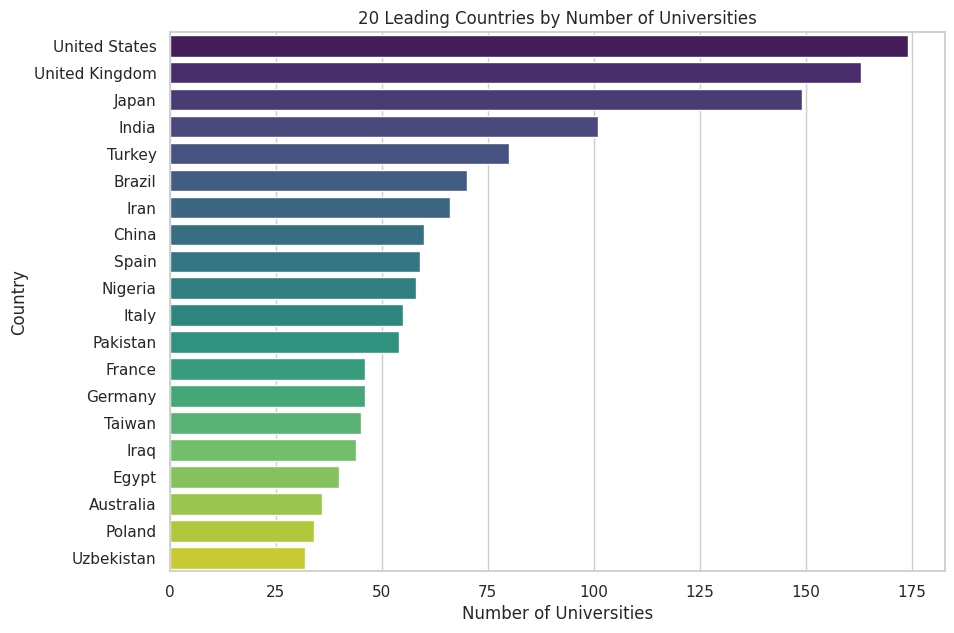

In [10]:
plt.figure(figsize=(10, 7))

sns.countplot(data=df, y='Country', order=df['Country'].value_counts().index[:20], palette="viridis")
plt.title('20 Leading Countries by Number of Universities')
plt.xlabel('Number of Universities')
plt.ylabel('Country')

plt.show()

As shown above, the United States leads in the number of universities, with the United Kingdom and Japan coming in second and third, respectively.

In [11]:
country_student=df.groupby(["Country"])["Number of Students"].sum()
country_student=pd.DataFrame(country_student).reset_index()
fig = px.choropleth(country_student, locations="Country", locationmode='country names',
        color="Number of Students", hover_name="Country", 
        color_continuous_scale="Turbo", title="Distribution of Students Across Countries")

fig.show()

The map displayed above reveals the student population in each country when you hover over it. We can also generate a bar chart to display the student population for each country, as shown below.

In [12]:
student_count=df.groupby(["Country"])["Number of Students"].sum().sort_values(ascending=False)[:20]
student_count
 
fig = px.bar(student_count,color=student_count)

fig.update_layout(
    title_text='20 Leading Countries by Student Population', 
    xaxis_title="Country", 
    yaxis_title="Number of Students",
    width=900
)

fig.show()

The United States has the highest population.

Next, we'll examine the distribution of international students across various countries using a pie chart.

In [13]:
countries=df.groupby(["Country"])["International Students"].sum().sort_values(ascending=False)[:10]
fig = px.pie(countries, values=countries, names=countries.index,
             title='Top 10 Countries by Total Number of International Students')
fig.show()

As illustrated above, the United Kingdom has the highest number of international students.

Let's create a violin plot to compare the proportion of international students in the top 20 universities and those ranked 21 and higher.

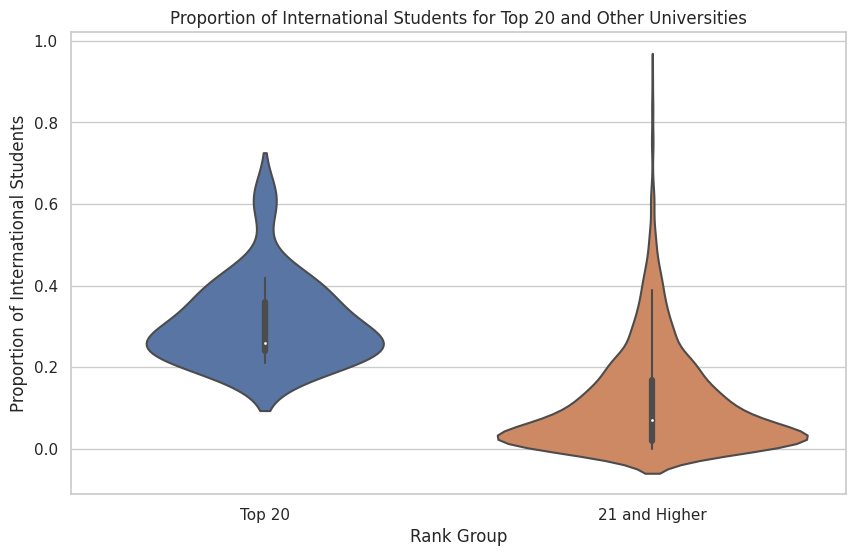

In [14]:
# Handle the rank ranges and special characters by taking the lower bound for sorting.
# Replace the special dash character with the standard hyphen
df['Rank'] = df['Rank'].str.replace('–', '-').str.split('-').str[0]

# Attempt to convert to integer, keeping non-convertible entries as NaN
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

# Drop NaNs in 'Rank'
df.dropna(subset=['Rank'], inplace=True)

# Convert 'Rank' to integer
df['Rank'] = df['Rank'].astype(int)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Rank Group', y='International Students', data=df.assign(
    **{'Rank Group': df['Rank'].apply(lambda x: 'Top 20' if x <= 20 else '21 and Higher')}))
plt.title('Proportion of International Students for Top 20 and Other Universities')
plt.xlabel('Rank Group')
plt.ylabel('Proportion of International Students')
plt.show()

The top 20 universities have a higher median proportion of international students, indicating a tendency for these universities to be more internationally diverse, while universities ranked 21 and higher show a wider spread in the proportion of international students, suggesting more variability.

Now, we explore the gender ratio of females to males across various universities.

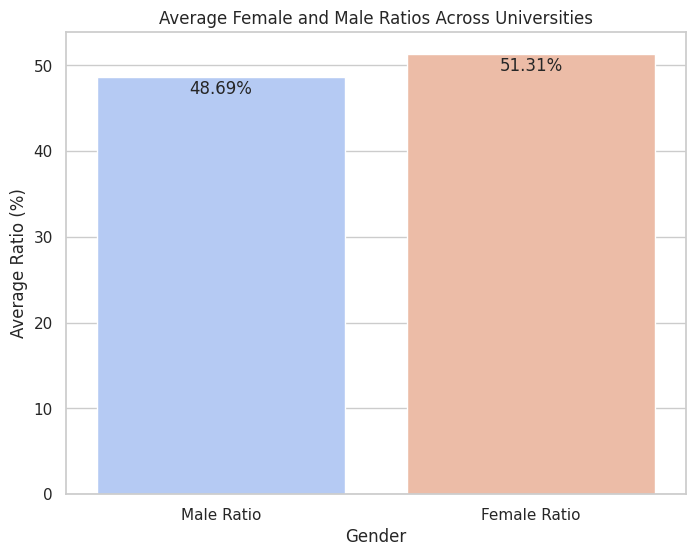

In [15]:
average_ratios = df[['Male Ratio', 'Female Ratio']].mean()

# Create a bar chart to show the average ratios
plt.figure(figsize=(8, 6))
sns.barplot(x=average_ratios.index, y=average_ratios.values, palette="coolwarm")
plt.xlabel('Gender')
plt.ylabel('Average Ratio (%)')
plt.title('Average Female and Male Ratios Across Universities')

# Annotate the bars with the actual values
for i, value in enumerate(average_ratios.values):
    plt.text(i, value - 2, f"{value:.2f}%", ha='center')

plt.show()

On average, there are more female students across the universities in this dataset, with a male-to-female ratio of approximately 47:53.

Let's also analyze the gender distribution at the top 20 universities, looking at the proportions of both males and females.

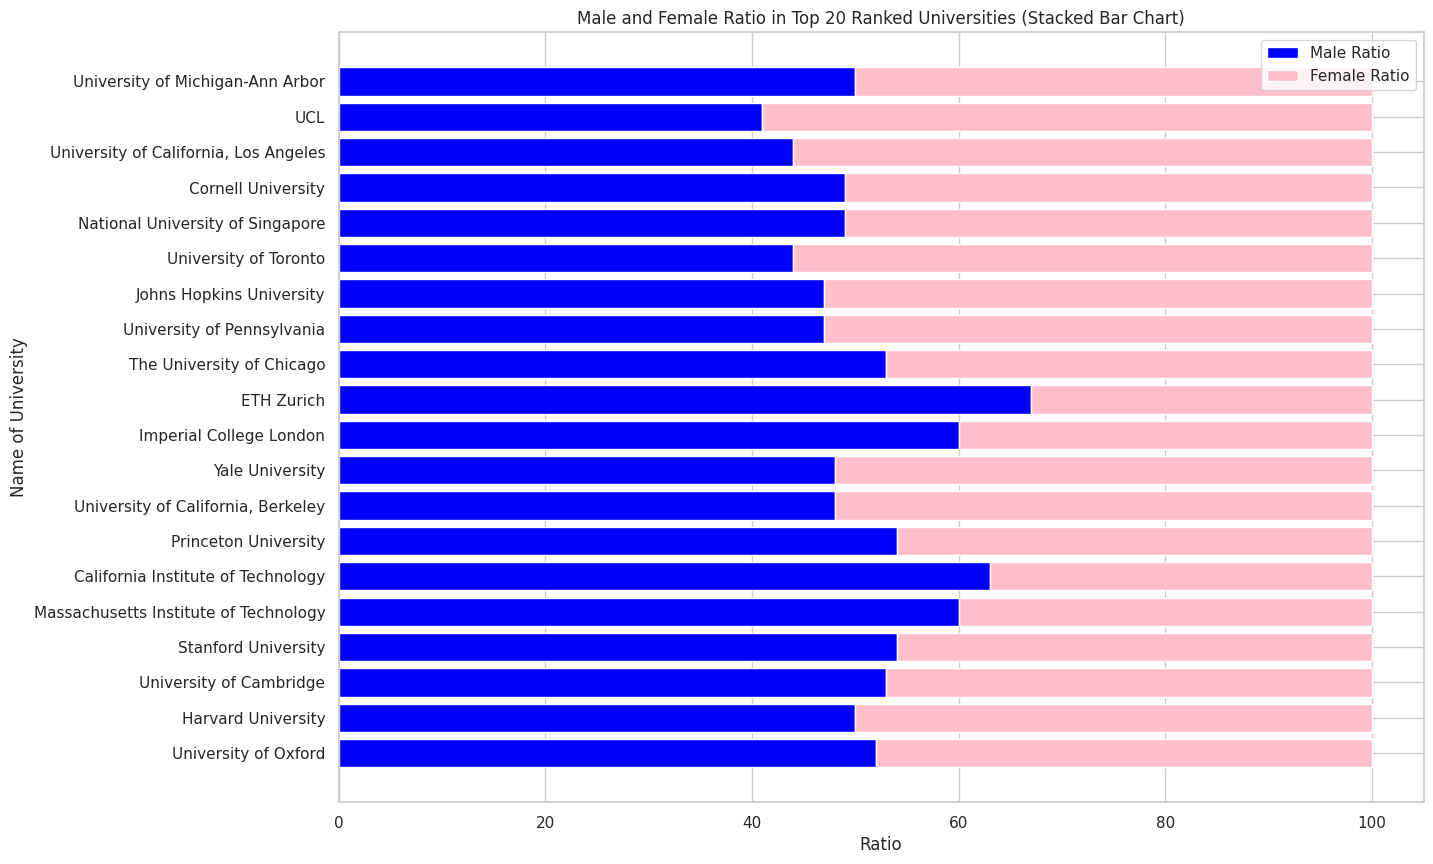

In [16]:
# Sort the DataFrame by rank and take the top 20 universities
top_20_df = df.sort_values('Rank').head(20)
# Create the stacked bar chart for Female and Male Ratios in top 20 universities
plt.figure(figsize=(14, 10))

# First plot the 'Male Ratio'
plt.barh(top_20_df['Name of University'], top_20_df['Male Ratio'], color='blue', label='Male Ratio')

# Next, plot the 'Female Ratio' on top of the 'Male Ratio'
plt.barh(top_20_df['Name of University'], top_20_df['Female Ratio'], left=top_20_df['Male Ratio'], 
         color='pink', label='Female Ratio')

# Add labels and title
plt.xlabel('Ratio')
plt.ylabel('Name of University')
plt.title('Male and Female Ratio in Top 20 Ranked Universities (Stacked Bar Chart)')
plt.legend()

# Show the plot
plt.show()

Most of the top 20 universities have a higher proportion of male students, as evidenced by the larger blue sections in most bars. Moreover, the universities that are famous for their STEM (Science, Technology, Engineering, and Mathematics) programs, like ETH Zurich, tend to have a higher proportion of male students. This reflects broader societal trends where STEM fields are often male-dominated.

Next, we'll generate a boxplot to investigate the student-to-staff ratio in top 20 universities and other universities.

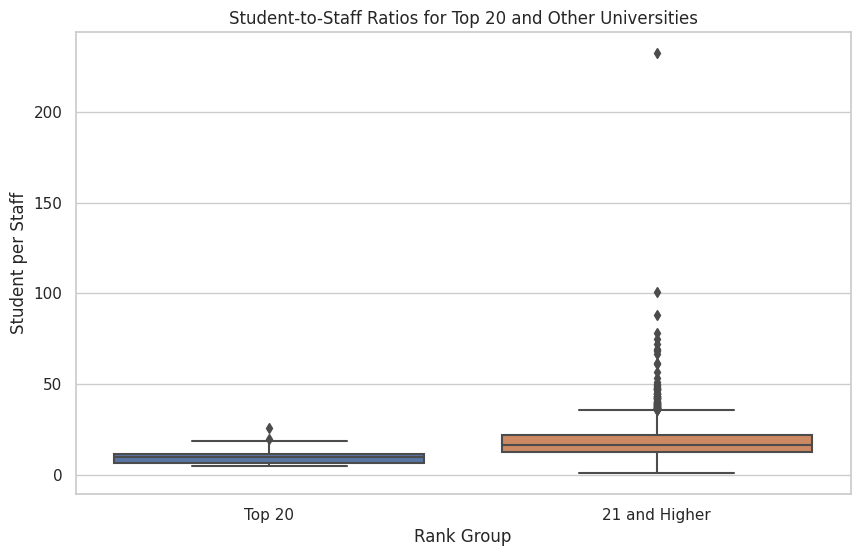

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rank Group', y='Student per Staff', data=df.assign(
    **{'Rank Group': df['Rank'].apply(lambda x: 'Top 20' if x <= 20 else '21 and Higher')}))
plt.title('Student-to-Staff Ratios for Top 20 and Other Universities')
plt.xlabel('Rank Group')
plt.ylabel('Student per Staff')
plt.show()

The box for the top 20 universities shows a narrower range, indicating less variability in student-to-staff ratios, whil the box for universities ranked 21 and higher shows a wider range, indicating more variability. Top 20 universities generally have a lower average student-to-staff ratio compared to universities ranked 21 and higher.

### 3. Conclusions
Through our comprehensive analysis of the World University Rankings dataset, we've gained several valuable insights into the landscape of global higher education. The key takeaways are as follows:

#### Global Distribution
The distribution of universities is not evenly spread across the globe, with certain regions and countries boasting a higher concentration of top-ranking institutions. This suggests potential opportunities for educational development in underrepresented regions.

#### Gender Diversity
While some universities have achieved a balanced gender ratio, there remains a significant disparity in many institutions, underscoring the need for targeted gender inclusivity programs.

#### Student-to-Staff Ratios
Universities with low student-to-staff ratios generally rank higher, implying that personalized education contributes to academic excellence.

#### Internationalization
Universities with a higher percentage of international students tend to rank better, signifying the importance of a diverse student body in the global educational landscape.